In [1]:
pip install pandas


In [2]:
pip install matplotlib

In [3]:
pip install seaborn

In [4]:
pip install scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"/content/House_Rent_Dataset.csv")

In [7]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [8]:
print(df.dtypes)

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [9]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [10]:
pip install scipy

In [11]:
#removing outliers

In [12]:
from scipy.stats import zscore

In [13]:
from scipy import stats

In [14]:
zscoress=stats.zscore(df['Rent'])
df=df[abs(zscoress)<3]

In [15]:
df['Rent']

,Rent
0,10000
1,20000
2,17000
3,10000
4,7500
...,...
4741,15000
4742,29000
4743,35000
4744,45000


In [17]:
pip install scikit-learn

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df['BHK']=LabelEncoder().fit_transform(df['BHK'])

<ipython-input-20-deb85449c760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BHK']=LabelEncoder().fit_transform(df['BHK'])


In [21]:
df['BHK']

,BHK
0,1
1,1
2,1
3,1
4,1
...,...
4741,1
4742,2
4743,2
4744,2


In [22]:
#Use descriptive statistics to summarize key dataset features.

In [24]:
df.skew(numeric_only=True)     # asymmetric values

,0
BHK,0.518541
Rent,3.155853
Size,2.194076
Bathroom,1.199183


In [25]:
df.kurtosis(numeric_only=True) # outliers

,0
BHK,0.441731
Rent,11.729654
Size,10.945590
Bathroom,3.854108


In [31]:
def mathh(x):
  print(df[x].mean())
  print(df[x].mode())
  print(df[x].median())
mathh('Rent')

29217.71794871795
0    15000
Name: Rent, dtype: int64
16000.0


In [32]:
mathh('Size')

944.9089743589743
0    1000
Name: Size, dtype: int64
840.0


In [33]:
cormatrix=df.corr(numeric_only=True)

In [34]:
print(cormatrix)

               BHK      Rent      Size  Bathroom
BHK       1.000000  0.478145  0.701527  0.780972
Rent      0.478145  1.000000  0.483369  0.597414
Size      0.701527  0.483369  1.000000  0.724618
Bathroom  0.780972  0.597414  0.724618  1.000000


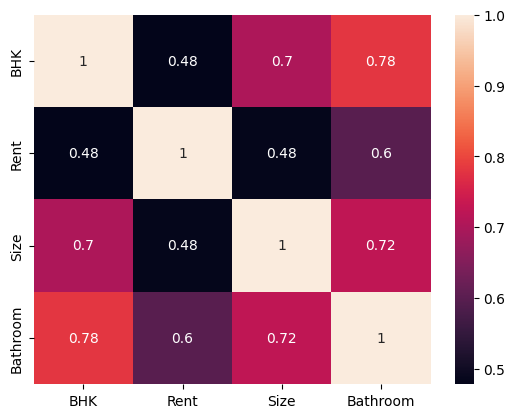

In [35]:
sns.heatmap(cormatrix,annot=True)
plt.show()

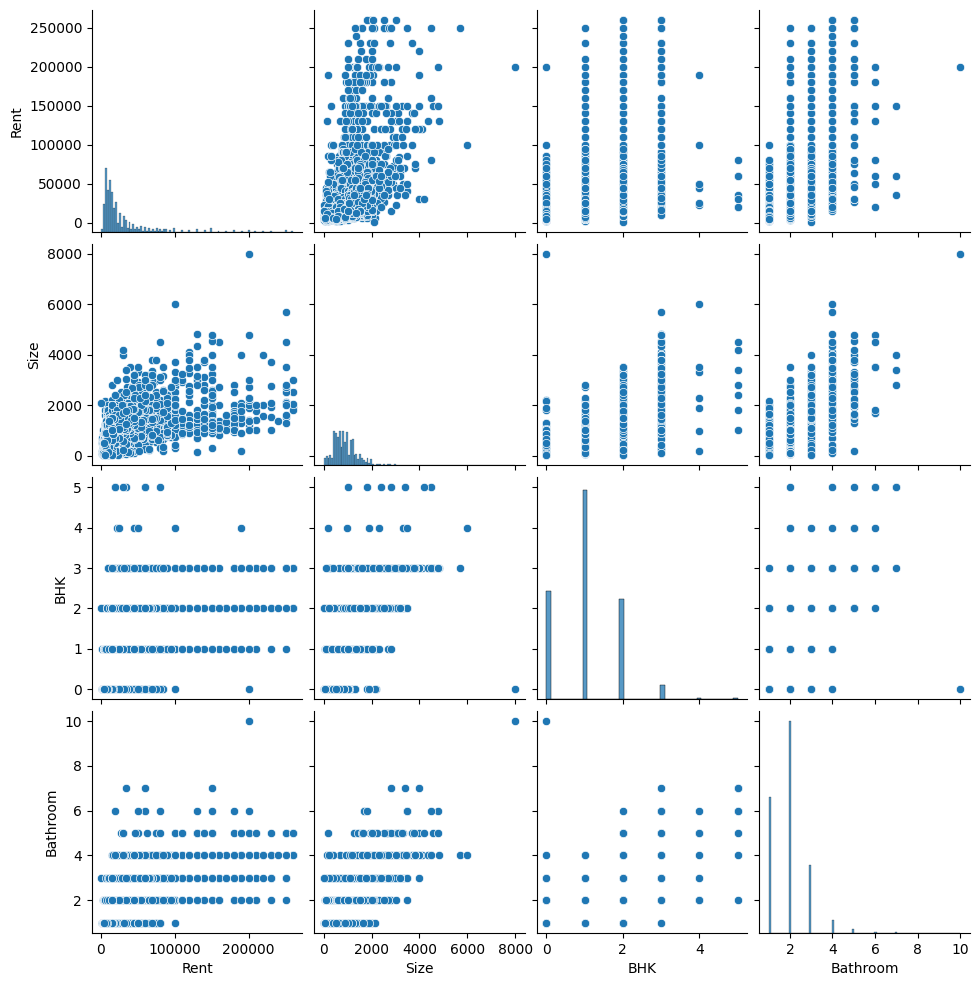

In [36]:
sns.pairplot(df[['Rent', 'Size', 'BHK', 'Bathroom']])
plt.show()